# Mandombe-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'MDB'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [2]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)

# display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,284.0,43.625192
GE,367.0,56.374808


In [4]:
a[0].sum()

651.0

In [5]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)

Typ
KON/MDB (?)      1.0
MDB            202.0
MDB (?)        188.0
MDB/BDG (?)      1.0
MDB/KON (?)      6.0
MDB/PDM (?)     10.0
OUE/MDB (?)      2.0
PDM/MDB (?)      3.0
All            413.0
Name: objID, dtype: float64

In [6]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], columns = 'Typ', aggfunc = np.sum, fill_value = '', margins = True)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl               \
Typ                                              KON/MDB (?)  MDB MDB (?)   
ort_fluss Ort                             bef_nr                            
Ngoko     Ngoko Fkm 17 (Elali) (Fpl. 275) 87/101                1       1   
          Pandama (Fpl. 276)              87/101           1                
                                          87/102                            
Sangha    Bonda (Fpl. 272)                87/101                        1   
          Ikelemba (Fpl. 260)             87/101                            
          Itandi (Fpl. 256)               87/101                2       1   
          Konda (Fpl. 268)                87/101                2       1   
          Maboko (Fpl. 267)               87/101                        1   
          Mai impembe (Fpl. 271)          87/102                        1   
          Mandombe (Fpl. 259)             87/101               14      17   
          Matoto (Fpl. 264)               87/101                        1   
          Molanda (Fpl. 258)              87/101                2       4   
                                          87/102                        1   
                                          87/103                1       1   
          Motoli (Fpl. 261)               87/101                        2   
          Ouesso (Fpl. 265)               87/102                        1   
          Pikunda (Fpl. 255)              87/1                108     135   
                                          87/101               62      13   
                                          87/2                205      14   
                                          87/3                          2   
          Sangha Fkm 428 (Fpl. 263)       87/428                        1   
All                                                        1  397     198   

                                                                          \
Typ                                              MDB/BDG (?) MDB/KON (?)   
ort_fluss Ort                             bef_nr                           
Ngoko     Ngoko Fkm 17 (Elali) (Fpl. 275) 87/101                           
          Pandama (Fpl. 276)              87/101                           
                                          87/102                       1   
Sangha    Bonda (Fpl. 272)                87/101                           
          Ikelemba (Fpl. 260)             87/101                           
          Itandi (Fpl. 256)               87/101                           
          Konda (Fpl. 268)                87/101                           
          Maboko (Fpl. 267)               87/101                       3   
          Mai impembe (Fpl. 271)          87/102                           
          Mandombe (Fpl. 259)             87/101                           
          Matoto (Fpl. 264)               87/101                           
          Molanda (Fpl. 258)              87/101                       1   
                                          87/102                           
                                          87/103                           
          Motoli (Fpl. 261)               87/101                           
          Ouesso (Fpl. 265)               87/102                           
          Pikunda (Fpl. 255)              87/1                             
                                          87/101           1               
                                          87/2                             
                                          87/3                             
          Sangha Fkm 428 (Fpl. 263)       87/428                           
All                                                        1           5   

                                                                          \
Typ                                              MDB/PDM (?) OUE/MDB (?)   
ort_fluss Ort                             bef_nr                           

In [7]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)

Anzahl Fundorte:

In [8]:
len(df_pivot.index)

21

Anzahl Stücke:

In [9]:
np.sum(df_pivot['Anzahl'])

651.0

Gewicht insgesamt in kg:

In [10]:
np.sum(df_pivot['Gewicht']) / 1000

19.203

In [11]:
# http://pandas.pydata.org/pandas-docs/stable/cookbook.html
df.ix[df['bef_art'].str.contains('Oberfl') == True, 'FEAT'] = 'Survey'
df.ix[~df['bef_art'].str.contains('Oberfl') == True, 'FEAT'] = 'Grabung'
df.ix[df['Typ'] == style, 'SICHERHEIT'] = 'sicher'
df.ix[df['Typ'].str.contains(' '), 'SICHERHEIT'] = 'fraglich'
df.ix[df['Anzahl'] == 1, 'AUFNAHME'] = 'EINZEL'
df.ix[df['Anzahl'] != 1, 'AUFNAHME'] = 'SAMMEL'

In [12]:
a = df.pivot_table(values='Anzahl', index='AUFNAHME', columns='FEAT', aggfunc=sum, margins = True)
a

FEAT,Grabung,Survey,All
AUFNAHME,,,
EINZEL,275.0,92.0,367.0
SAMMEL,233.0,51.0,284.0
All,508.0,143.0,651.0


### Scherbentypen

In [13]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,2.0,0.309598
R,219.0,33.900929
W,425.0,65.789474
B,0.0,0.000000


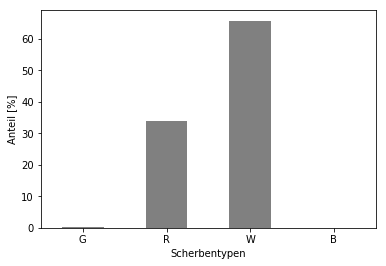

In [14]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Technologische Merkmale (*fabrics*)

In [15]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [16]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


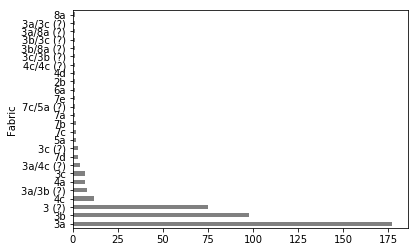

In [17]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


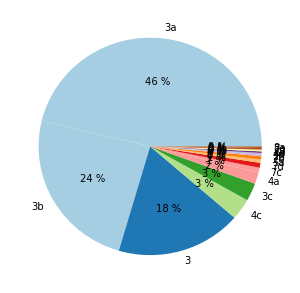

In [18]:
df1 = df.dropna(subset = ['Fabric'])
df1['Fabric'] = df1['Fabric'].map(lambda x: x.rstrip(' (?)'))
df1['Fabric'] = df1['Fabric'].apply(lambda x: x.split('/')[0])\

a = df1.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
a = pd.DataFrame(a)
a = a.sort_index(by=['Anzahl'], ascending=[False])

fig = plt.figure()
fig.set_size_inches(5, 5)
a['Anzahl'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [19]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
3a,177,42.857143
3b,98,23.728814
3 (?),75,18.159806
4c,12,2.905569
3a/3b (?),8,1.937046


In [20]:
a = pd.Series({'Schamott':len(df.loc[df['Fabric'].str.contains("9")].index),
               'Rest':len(df.loc[~df['Fabric'].str.contains("9")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rest,356,100.0
Schamott,0,0.0


In [21]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,1,0.529101
wenig,2,1.058201
mittel,42,22.222222
viel,129,68.253968
sehr viel,15,7.936508


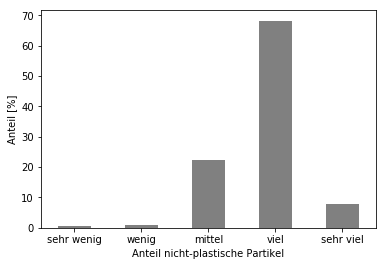

In [22]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [23]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,1,0.526316
F,1,0.526316
M,63,33.157895
C,104,54.736842
VC,21,11.052632


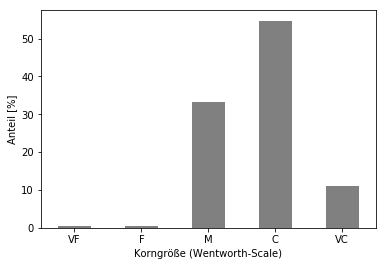

In [24]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [25]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,114,60.000000
S/Org,32,16.842105
S/Gl,14,7.368421
S/rote Partikel,8,4.210526
S/Laterit,7,3.684211
S/Laterit?,2,1.052632
S/Org/Gl,1,0.526316
S/Schamott (?),1,0.526316
S/Org/rote Partikel,1,0.526316


### Brennfarbe

In [26]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,120,31.088083
Sonstig,176,45.595855
Weiß,90,23.316062


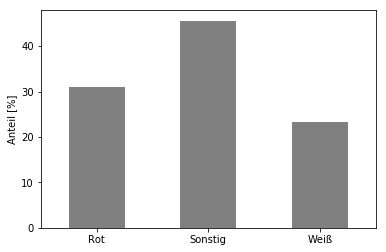

In [27]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [28]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

         367
g        114
bg       101
          97
bg bg     30
br        12
g bg       8
g g        7
 bg        5
bg g       4
dtype: int64

### Oberfläche der Scherben

In [29]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
Außen aufgeraut/Schlicker?,6.0,2.597403
außen glatt/innen rau,2.0,0.865801
glatt,159.0,68.831169
glatt/leicht rau,1.0,0.432900
innen rau,1.0,0.432900
leicht rau,50.0,21.645022
rau,12.0,5.194805


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


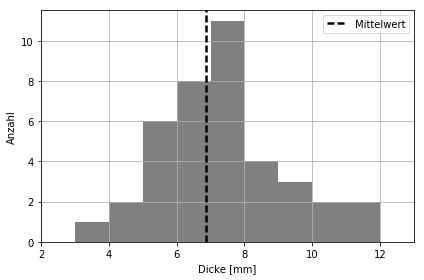

In [2]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE 'NGO%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

In [3]:
df['Wandung'].describe()

count    39.000000
mean      6.871795
std       1.921889
min       3.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      12.000000
Name: Wandung, dtype: float64

In [4]:
df['Wandung'].var()

3.693657219973008

## Gefäßformen

In [33]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [34]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [35]:
df_pivot['objID'].sum()

119

In [36]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,58,48.739496
sicher,61,51.260504


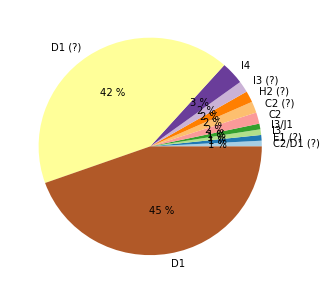

In [37]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [38]:
df1 = df.dropna(subset = ['Form_Gef'])
df1['Form_Gef'] = df1['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Gef'] = df1['Form_Gef'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

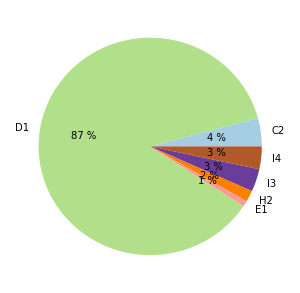

In [39]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

### Proportionen

In [40]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['maxD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

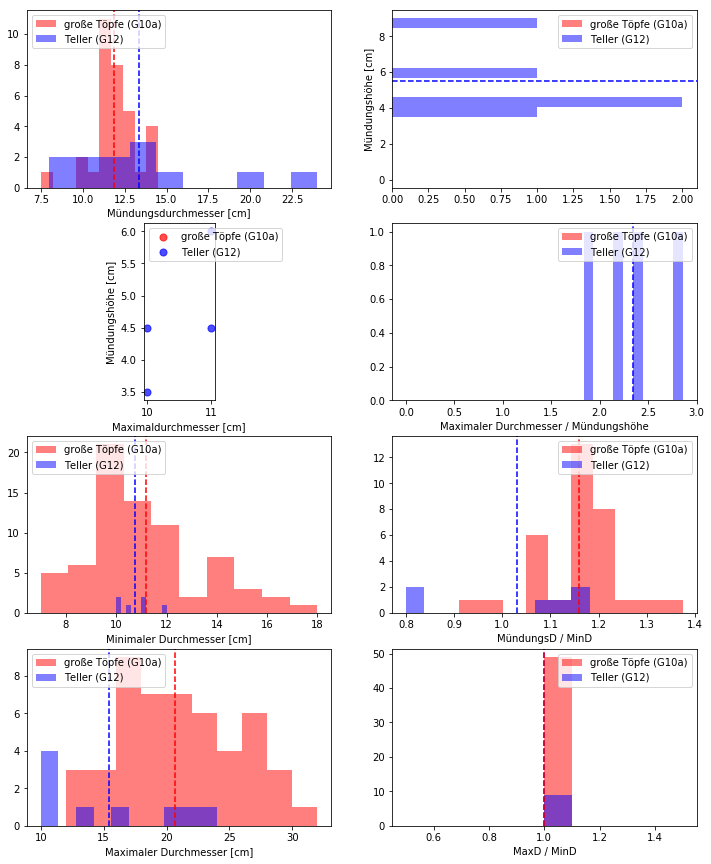

In [41]:
a = df.loc[df['Form_Gef'].str.contains("D1")] 
b = df.loc[~df['Form_Gef'].str.contains("D1")] 

fig = plt.figure(1)
fig.set_size_inches(12,15)

ax = plt.subplot(421)

a['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (G10a)', alpha = 0.5)
b['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (G12)', alpha = 0.5)

plt.axvline(b['muendungsD'].mean(), color='b', linestyle = '--')
plt.axvline(a['muendungsD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

#df['muendungsD'].hist(histtype='stepfilled')
plt.xlabel("Mündungsdurchmesser [cm]")
plt.legend(loc = 2)

ax = plt.subplot(422)

a['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (G10a)', alpha = 0.5, orientation='horizontal')
b['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (G12)', alpha = 0.5, orientation='horizontal')

plt.axhline(b['muendungsH'].mean(), color='b', linestyle = '--')
plt.axhline(a['muendungsH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.ylabel("Mündungshöhe [cm]")
plt.legend(loc = 1)

ax = plt.subplot(423)

plt.scatter(a['maxD'], a['muendungsH'], alpha=0.7, c = 'r', s = 50, label = 'große Töpfe (G10a)')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.7, c = 'b', s = 50, label = 'Teller (G12)')

ax.set_aspect('equal')

plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax = plt.subplot(424)

a['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (G10a)', alpha = 0.5)
b['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (G12)', alpha = 0.5)

plt.axvline(b['maxD-muendH'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD-muendH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

# df['maxD-muendH'].hist(histtype='stepfilled', fc='#CCCCCC')
plt.xlabel("Maximaler Durchmesser / Mündungshöhe")
plt.legend(loc = 1)

ax = plt.subplot(425)

a['minD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (G10a)', alpha = 0.5)
b['minD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (G12)', alpha = 0.5)

plt.axvline(b['minD'].mean(), color='b', linestyle = '--')
plt.axvline(a['minD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("Minimaler Durchmesser [cm]")
plt.legend(loc = 2)

ax = plt.subplot(426)

a['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (G10a)', alpha = 0.5)
b['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (G12)', alpha = 0.5)

plt.axvline(b['muend-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['muend-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("MündungsD / MinD")
plt.legend(loc = 1)

ax = plt.subplot(427)

a['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (G10a)', alpha = 0.5)
b['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (G12)', alpha = 0.5)

plt.axvline(b['maxD'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("Maximaler Durchmesser [cm]")
plt.legend(loc = 2)

ax = plt.subplot(428)

a['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (G10a)', alpha = 0.5)
b['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (G12)', alpha = 0.5)

plt.axvline(b['max-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['max-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

plt.xlabel("MaxD / MinD")

plt.savefig('../output/figs/3-1-2-2_NGO_Keramik-Abmessungen.pdf')
plt.show()

In [42]:
a.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,33.000000,0.0,72.000000,0.0,49.000000,0.0,1.0,0.0,33.000000,49.0
mean,11.893939,NaN,11.173611,NaN,20.693878,NaN,5.0,NaN,1.159034,1.0
std,1.401771,NaN,2.159420,NaN,4.801059,NaN,NaN,NaN,0.082855,0.0
min,7.500000,NaN,7.000000,NaN,12.000000,NaN,5.0,NaN,0.909091,1.0
25%,11.000000,NaN,10.000000,NaN,17.000000,NaN,5.0,NaN,1.100000,1.0
50%,12.000000,NaN,11.000000,NaN,20.000000,NaN,5.0,NaN,1.166667,1.0
75%,13.000000,NaN,12.000000,NaN,25.000000,NaN,5.0,NaN,1.200000,1.0
max,14.500000,NaN,18.000000,NaN,32.000000,NaN,5.0,NaN,1.375000,1.0


C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


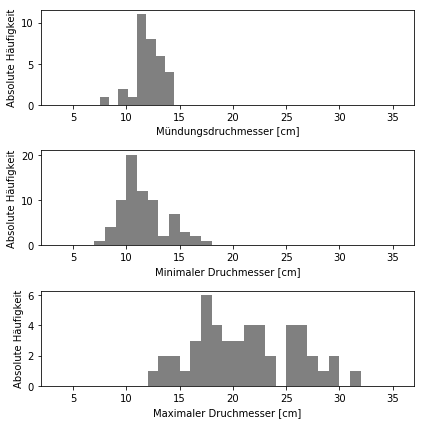

In [43]:
mi = min(round(a['minD'])) - 5
ma = round(max(a['maxD'])) + 5

fig = plt.figure(1)
fig.set_size_inches(6,6)

ax = plt.subplot(311)
bins = round(max(round(a['minD'])) - min(round(a['minD'])))
ax = a['muendungsD'].hist(histtype='stepfilled', bins = 8, fc = 'grey')
plt.xlabel("Mündungsdruchmesser [cm]")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.show()

ax = plt.subplot(312)
bins = round(max(a['minD']) - min(a['minD']))
ax = a['minD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.xlabel("Minimaler Druchmesser [cm]")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.show()

ax = plt.subplot(313)
bins = round(max(a['maxD']) - min(a['maxD']))
ax = a['maxD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.xlabel("Maximaler Druchmesser [cm]")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
plt.savefig('../output/figs/3-1-2-7_MDB_Proportionen_D1-Gef.pdf', bbox_inches='tight')
plt.show()

## Bauchform

In [44]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [45]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A2,70,61.946903
A1,40,35.398230
A3/A1,2,1.769912
A2 (?),1,0.884956


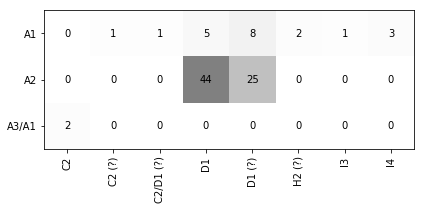

In [46]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

## Mündungs- und Randformen

In [47]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [48]:
# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M4,96,89.719626
M3,5,4.672897
M1,2,1.869159
M2,2,1.869159
M5,2,1.869159


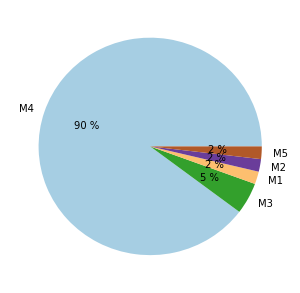

In [49]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [50]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1.1,59,49.166667
B2,35,29.166667
B1,14,11.666667
B3,6,5.000000
A1,1,0.833333


In [51]:
df_pivot['objID'].sum()

120

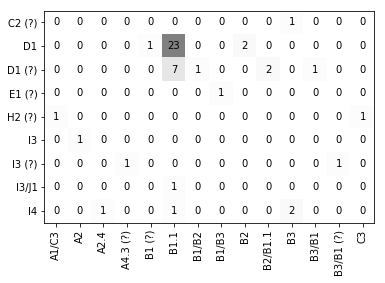

In [52]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', columns = 'Form_Rand', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
# plt.savefig('output/3-1-1-6_Bobulu_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

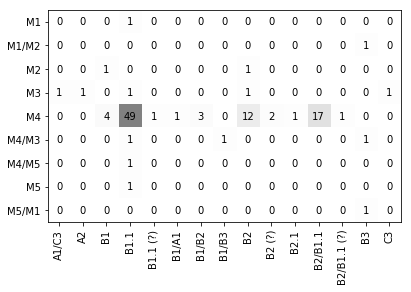

In [53]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
# plt.savefig('output/3-1-1-6_Bobulu_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


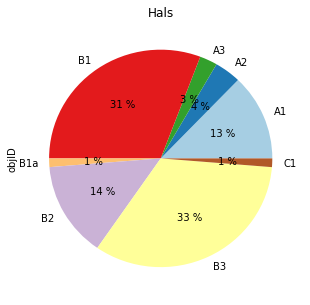

In [54]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Hals'])
df1['Form_Hals'] = df1['Form_Hals'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Hals'] = df1['Form_Hals'].apply(lambda x: x.split('/')[0])


df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

In [55]:
# leere Zellen & X entfernen
b = df['Form_Hals']
b = pd.DataFrame(b)
b = b.dropna()
b = b[b['Form_Hals'] != 'X']
b
# enthält 'kurz' oder nicht
c = pd.Series({'kurz':len(b.loc[b['Form_Hals'].str.contains("kurz")].index),
               'nicht-kurz':len(b.loc[~b['Form_Hals'].str.contains("kurz")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
kurz,7,8.974359
nicht-kurz,71,91.025641


C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


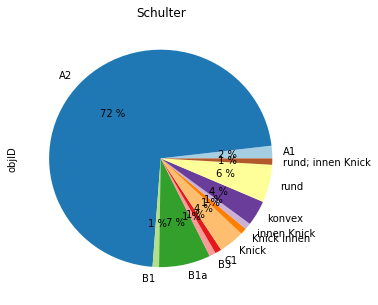

In [56]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Schulter'])
df1['Form_Schulter'] = df1['Form_Schulter'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Schulter'] = df1['Form_Schulter'].apply(lambda x: x.split('/')[0])


df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

## Bodenformen

In [57]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', columns='Typ', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
#df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

Typ,MDB (?)
Form_Boden,
B1,1
B2,1
B4,1
B9,1
B9/B10 (?),1


In [58]:
len(df['Form_Boden'])

5

## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


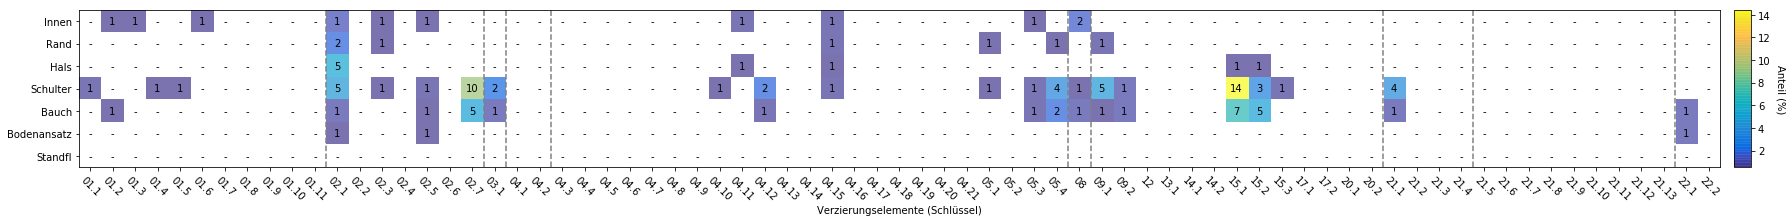

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-7_Mandombe_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [61]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [62]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

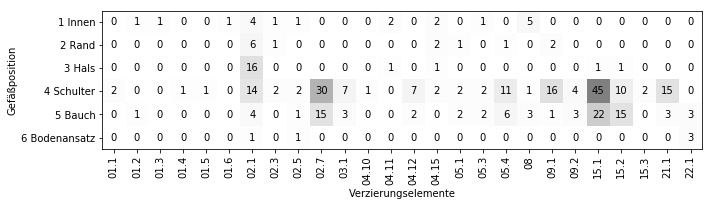

In [63]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
# plt.savefig('output/3-1-1-6_Bobulu_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [64]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


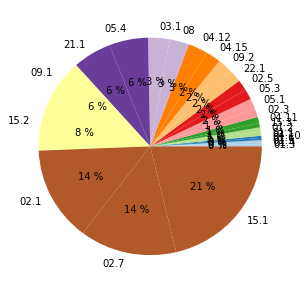

In [65]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')
#plt.title('Mokelo-Gruppe\nGefäßformen')
#plt.savefig('output/3-1-1-3_Mokelo-Gr_GefForm2.pdf')

In [66]:
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,objID,Prozent
verzName,,
15.1,68,21.2500
02.7,45,14.0625
02.1,45,14.0625
15.2,26,8.1250
09.1,19,5.9375


In [67]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,19,5.9375
2 Rand,13,4.0625
3 Hals,20,6.2500
4 Schulter,177,55.3125
5 Bauch,86,26.8750
6 Bodenansatz,5,1.5625


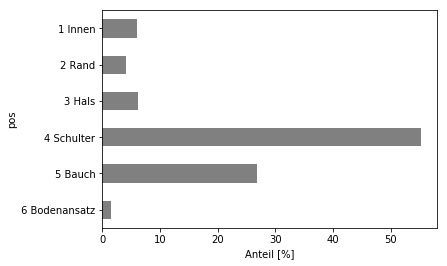

In [68]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

## Verbreitung

In [69]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
5,Pikunda (Fpl. 255),255,16.635736,0.549344,MDB
0,Itandi (Fpl. 256),256,16.590471,0.697639,MDB
3,Molanda (Fpl. 258),258,16.537896,0.945646,MDB
2,Mandombe (Fpl. 259),259,16.522700,1.116917,MDB
1,Ikelemba (Fpl. 260),260,16.504824,1.227166,MDB (?)
9,Motoli (Fpl. 261),261,16.467736,1.227602,MDB (?)
14,Sangha Fkm 428 (Fpl. 263),263,16.443523,1.250183,MDB (?)
7,Matoto (Fpl. 264),264,16.431282,1.281643,MDB (?)
11,Ouesso (Fpl. 265),265,16.057202,1.617344,MDB (?)
4,Maboko (Fpl. 267),267,16.135199,1.731363,MDB (?)


In [70]:
df.to_csv("../data/processed/3-1-2-7_MDB_Verbreitung.csv", index = False)

In [71]:
len(df)

15

# Appendix

## Tafeln

In [72]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Scherbe,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Scherbe,Typ,Form_Gef,Form_Rand,Form_Boden
0,47,22,PIK,87/1,NaN,-2:119 -3:5 -4:6,R,MDB,D1,B1.1,None
1,48,6,PIK,87/1,NaN,-2:119 -3:5 -4:6,R,MDB,D1,B1.1,None
2,47,23,PIK,87/1,NaN,-2:5,W,MDB,None,None,None
3,47,24,PIK,87/1,NaN,-2:3 -3:7,G,MDB,D1,B1.1,None
4,48,1,PIK,87/1,NaN,-3:9,R,MDB,D1,B1.1,None
5,48,2,PIK,87/1,NaN,-2:225,G,MDB,D1,B1.1,None
6,48,3,PIK,87/1,NaN,-1:170,R,MDB,D1,B1.1,None
7,48,4,PIK,87/1,NaN,-2:124,R,MDB,D1,B1.1,None
8,48,5,PIK,87/1,NaN,-1:174,R,MDB,D1,B1.1,None
9,48,8,PIK,87/1,NaN,-2:120,R,MDB (?),None,B1/A1,None
